<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#image" data-toc-modified-id="image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>image</a></span></li><li><span><a href="#model" data-toc-modified-id="model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>model</a></span><ul class="toc-item"><li><span><a href="#detect-face" data-toc-modified-id="detect-face-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>detect face</a></span></li><li><span><a href="#emotion_recognition" data-toc-modified-id="emotion_recognition-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>emotion_recognition</a></span></li><li><span><a href="#estimate_headpose" data-toc-modified-id="estimate_headpose-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>estimate_headpose</a></span></li><li><span><a href="#estimate_humanpose" data-toc-modified-id="estimate_humanpose-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>estimate_humanpose</a></span><ul class="toc-item"><li><span><a href="#2D" data-toc-modified-id="2D-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>2D</a></span></li><li><span><a href="#3D" data-toc-modified-id="3D-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>3D</a></span></li></ul></li><li><span><a href="#Instance-segmentation" data-toc-modified-id="Instance-segmentation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Instance segmentation</a></span></li></ul></li></ul></div>

# import

In [15]:
from pyvino.model import (FaceDetector, 
                                              BodyDetector,
                                              HumanPoseDetector,
                                              Human3DPoseDetector,                          
                                              HeadPoseDetector,
                                              EmotionRecognizer,
                                              InstanceSegmentor)

In [16]:
import numpy as np
from PIL import Image
import cv2
from pyvino.util.config import TASKS 
from pyvino.util.image import cv2pil

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# image

In [17]:
path_image = '../data/test/person1.jpg'
input_image = cv2.imread(path_image)

# model

## detect face

2020-01-04 07:12:55,544 - pyvino.model.object_detection.object_detector - INFO - face-detection-adas-0001 on Linux
2020-01-04 07:12:55,546 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


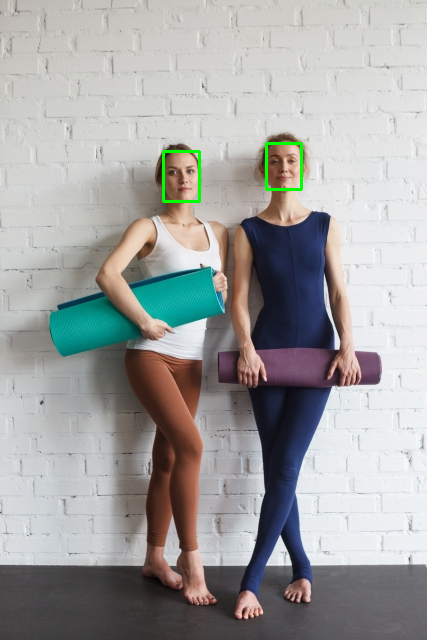

In [18]:
model = FaceDetector()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

In [22]:
results['preds']

{0: {'label': 1.0,
  'conf': 1.0,
  'bbox': (163, 151, 199, 201),
  'bbox_size': 1800},
 1: {'label': 1.0,
  'conf': 1.0,
  'bbox': (266, 143, 301, 189),
  'bbox_size': 1610}}

## detect face

2020-01-04 07:13:19,608 - pyvino.model.object_detection.object_detector - INFO - person-detection-retail-0013 on Linux
2020-01-04 07:13:19,610 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


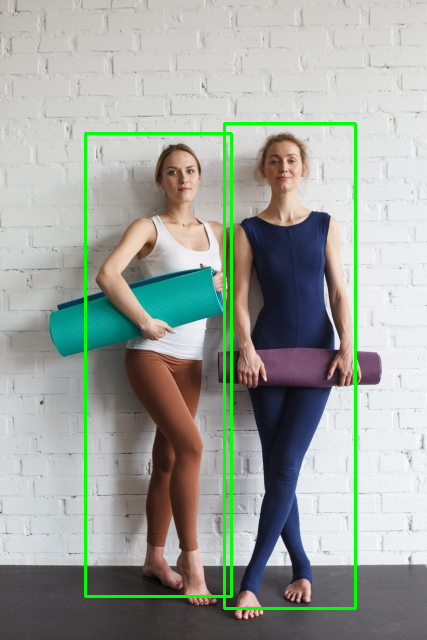

In [23]:
model = BodyDetector(model_dir='/home/ubuntu/src/pyvino/intel_models/')
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

In [24]:
results['preds']

{0: {'label': 1.0,
  'conf': 0.99908817,
  'bbox': (224, 123, 355, 608),
  'bbox_size': 63535},
 1: {'label': 1.0,
  'conf': 0.9961326,
  'bbox': (85, 133, 231, 596),
  'bbox_size': 67598}}

## emotion_recognition

2020-01-04 07:13:22,492 - pyvino.model.object_detection.object_detector - INFO - emotions-recognition-retail-0003 on Linux
2020-01-04 07:13:22,494 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2020-01-04 07:13:22,575 - pyvino.model.object_detection.object_detector - INFO - face-detection-adas-0001 on Linux
2020-01-04 07:13:22,576 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


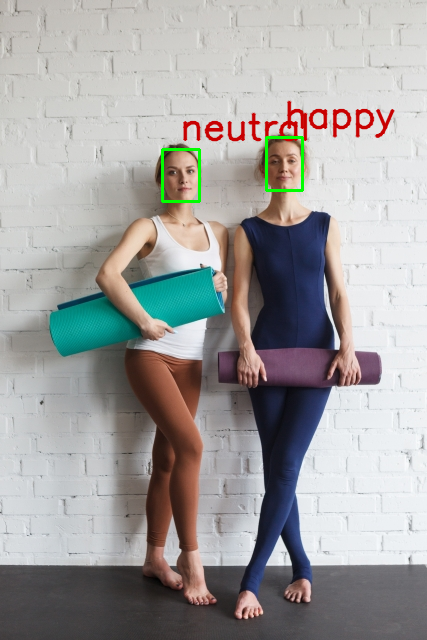

In [25]:
model = EmotionRecognizer()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

In [26]:
results['preds']

{0: {'bbox': (162, 149, 199, 201), 'emotion': 'neutral'},
 1: {'bbox': (266, 137, 302, 190), 'emotion': 'happy'}}

## estimate_headpose

2020-01-04 07:13:26,679 - pyvino.model.object_detection.object_detector - INFO - head-pose-estimation-adas-0001 on Linux
2020-01-04 07:13:26,681 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2020-01-04 07:13:26,747 - pyvino.model.object_detection.object_detector - INFO - face-detection-adas-0001 on Linux
2020-01-04 07:13:26,748 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


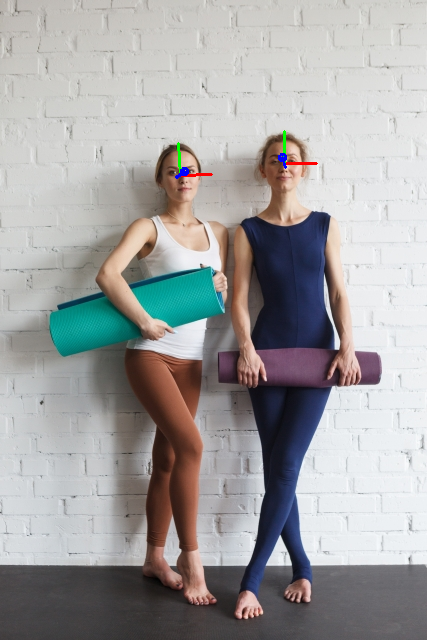

In [27]:
model = HeadPoseDetector()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

In [28]:
results['preds']

{0: {'bbox': (162, 149, 199, 201),
  'yaw': 7.2770314,
  'pitch': -5.182346,
  'roll': -1.6474631,
  'center_of_face': (180.5, 175.0, 0)},
 1: {'bbox': (266, 137, 302, 190),
  'yaw': -2.0385542,
  'pitch': -8.885681,
  'roll': 0.7235794,
  'center_of_face': (284.0, 163.5, 0)}}

## estimate_humanpose

### 2D

2020-01-04 07:13:30,406 - pyvino.model.object_detection.object_detector - INFO - human-pose-estimation-0001 on Linux
2020-01-04 07:13:30,408 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2020-01-04 07:13:30,624 - pyvino.model.object_detection.object_detector - INFO - person-detection-retail-0013 on Linux
2020-01-04 07:13:30,625 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so
2020-01-04 07:13:30,943 - pyvino.model.object_detection.object_detector - INFO - instance-segmentation-security-0050 on Linux
2020-01-04 07:13:30,944 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


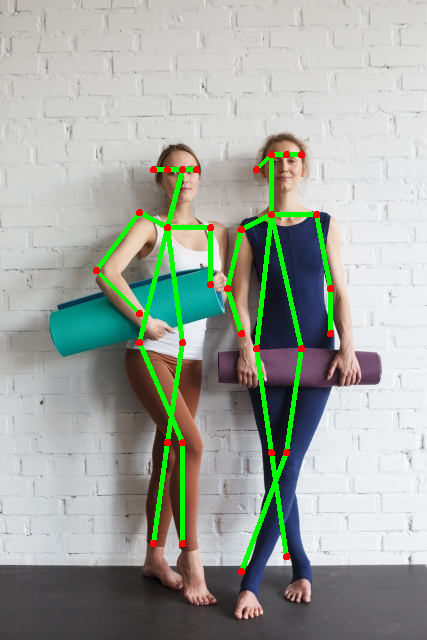

In [29]:
model = HumanPoseDetector()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

In [30]:
results['preds']

{0: {'points': array([[271., 154.],
         [271., 214.],
         [241., 229.],
         [227., 288.],
         [241., 333.],
         [316., 214.],
         [330., 288.],
         [330., 333.],
         [256., 348.],
         [271., 452.],
         [286., 556.],
         [301., 348.],
         [286., 452.],
         [241., 571.],
         [271., 154.],
         [286., 154.],
         [256., 169.],
         [301., 154.]]), 'bbox': (227, 140, 354, 616)},
 1: {'points': array([[182., 169.],
         [167., 227.],
         [139., 212.],
         [ 96., 270.],
         [139., 313.],
         [210., 227.],
         [210., 284.],
         [210., 284.],
         [139., 342.],
         [182., 442.],
         [182., 543.],
         [182., 342.],
         [167., 442.],
         [153., 543.],
         [167., 169.],
         [182., 169.],
         [153., 169.],
         [196., 169.]]), 'bbox': (96, 141, 232, 601)}}

### 3D

2020-01-04 07:13:34,323 - pyvino.model.base_model.base_model - INFO - human-pose-estimation-3d on Linux
2020-01-04 07:13:34,325 - pyvino.model.base_model.base_model - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


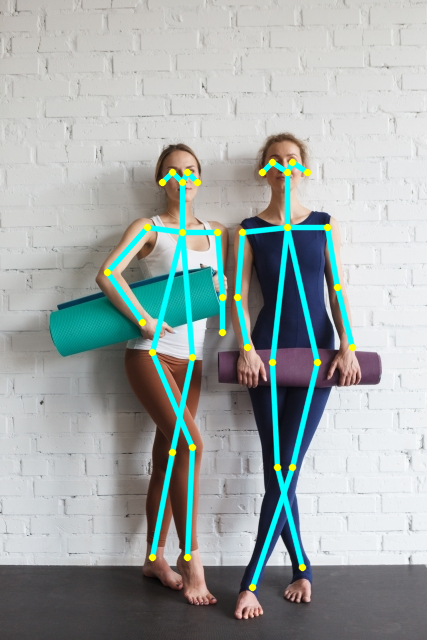

In [31]:
model = Human3DPoseDetector(model_dir='/home/ubuntu/src/pyvino/intel_models/')
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image

In [32]:
results['preds']

{'pose_2d': array([[287.        , 227.        ,   0.96452487],
        [287.        , 172.        ,   0.91230786],
        [         nan,          nan,          nan],
        [327.        , 227.        ,   0.9397798 ],
        [337.        , 287.        ,   0.9851542 ],
        [352.        , 347.        ,   0.906385  ],
        [317.        , 362.        ,   0.8048203 ],
        [292.        , 467.        ,   0.8890908 ],
        [252.        , 587.        ,   0.8408992 ],
        [242.        , 232.        ,   0.8959944 ],
        [237.        , 297.        ,   0.9667599 ],
        [247.        , 347.        ,   1.0094346 ],
        [272.        , 362.        ,   0.7648312 ],
        [277.        , 467.        ,   0.8281858 ],
        [302.        , 567.        ,   0.91078067],
        [272.        , 162.        ,   0.9112873 ],
        [292.        , 162.        ,   0.94828117],
        [262.        , 172.        ,   0.87012875],
        [307.        , 172.        ,   0.9461802 ]], 

In [33]:
poses_2d = results['preds']['pose_2d']
poses_3d = results['preds']['pose_3d']
edges = results['preds']['edges']

In [34]:
body_edges = np.array(
    [[0, 1],  # neck - nose
     [1, 16], [16, 18],  # nose - l_eye - l_ear
     [1, 15], [15, 17],  # nose - r_eye - r_ear
     [0, 3], [3, 4], [4, 5],     # neck - l_shoulder - l_elbow - l_wrist
     [0, 9], [9, 10], [10, 11],  # neck - r_shoulder - r_elbow - r_wrist
     [0, 6], [6, 7], [7, 8],        # neck - l_hip - l_knee - l_ankle
     [0, 12], [12, 13], [13, 14]])  # neck - r_hip - r_knee - r_ankle

<IPython.core.display.Javascript object>


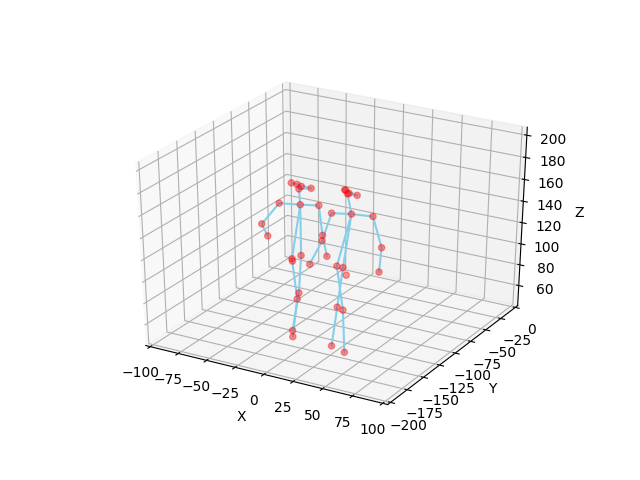

In [35]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for pose_3d in poses_3d:
    ax.scatter(pose_3d[:, 0], pose_3d[:, 1], pose_3d[:, 2], alpha=0.4, color='red')
    for body_edge in body_edges:
        ax.plot(
            (pose_3d[body_edge[0]][0], pose_3d[body_edge[1]][0]),
            (pose_3d[body_edge[0]][1], pose_3d[body_edge[1]][1]),
            (pose_3d[body_edge[0]][2], pose_3d[body_edge[1]][2]),
        color='skyblue')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-100,100)
    ax.set_ylim(100,200)
    ax.set_ylim(-200,0)
plt.show()

## Instance segmentation

2020-01-04 07:13:46,755 - pyvino.model.object_detection.object_detector - INFO - instance-segmentation-security-0050 on Linux
2020-01-04 07:13:46,757 - pyvino.model.object_detection.object_detector - INFO - The path to cpu_extension is /opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so


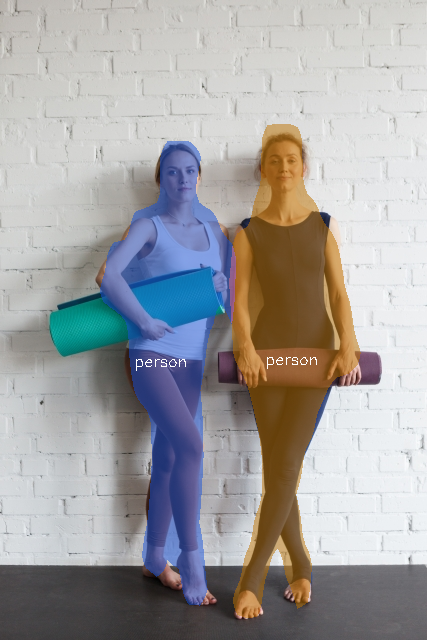

In [36]:
model = InstanceSegmentor()
#compute and return frame
results = model.compute(input_image)
output_image = results['frame']
output_image = cv2pil(output_image)
output_image